# How to address overfitting in neural networks

Most of the keras code are in main_scripts

In [1]:
import main_scripts as ms
from keras.datasets import reuters
import matplotlib.pyplot as plt

# for visualizing neural network
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
# vectorize x and label data
x_train = ms.vectorize_words(train_data, dimension=10000)
x_test = ms.vectorize_words(test_data, dimension=10000)

one_hot_train_labels = ms.vectorize_words(train_labels, dimension=46)
one_hot_test_labels = ms.vectorize_words(test_labels, dimension=46)

# create validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Build and fit models

In [ ]:
model_orig = ms.nn_architecture(num_act_units=[64, 64], 
                            output_act_units=46, 
                            input_unit_shape=(10000,))

history_orig = model_orig.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

In [ ]:
model_low_cap = ms.nn_architecture(num_act_units=[4, 4], 
                            output_act_units=46, 
                            input_unit_shape=(10000,))
history_low_cap = model_low_cap.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

In [ ]:
model_high_cap = ms.nn_architecture(num_act_units=[640, 640], 
                            output_act_units=46, 
                            input_unit_shape=(10000,))
history_high_cap = model_high_cap.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

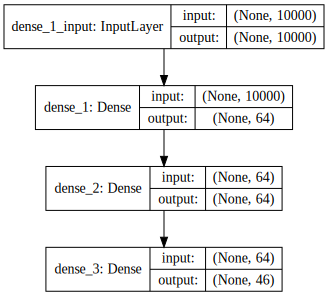

In [4]:
SVG(model_to_dot(model_orig, show_shapes=True).create(prog='dot', format='svg'))

# Accuracy and Loss Curves
Plot the accuracy and loss curves the original model, the simple mode, the complex model for comparison

In [72]:
def loss_curve(history_dict):
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(history_dict['acc']) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def compare_val_loss(hist_dict_1, hist_dict_2, model_name_1, model_name_2):
    
    val_loss_values_1 = hist_dict_1['val_loss']
    val_loss_values_2 = hist_dict_2['val_loss']
    epochs = range(1, len(hist_dict_1['val_loss'])+ 1)
    
    plt.plot(epochs, val_loss_values_1, 'bo', color='k', label=model_name_1)
    plt.plot(epochs, val_loss_values_2, 'b', label=model_name_2)
    
    plt.title('{} vs {}'.format(model_name_1, model_name_2))
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.legend()
    
    plt.show
    
def compare_val_acc(hist_dict_1, hist_dict_2, model_name_1, model_name_2):
    
    val_acc_values_1 = hist_dict_1['val_acc']
    val_acc_values_2 = hist_dict_2['val_acc']
    epochs = range(1, len(hist_dict_1['val_acc'])+ 1)
    
    plt.plot(epochs, val_acc_values_1, 'bo', color='k', label=model_name_1)
    plt.plot(epochs, val_acc_values_2, 'b', label=model_name_2)
    
    plt.title('{} vs {}'.format(model_name_1, model_name_2))
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    
    plt.show
    
def compare_train_loss(hist_dict_1, hist_dict_2, model_name_1, model_name_2):
    
    val_train_loss_values_1 = hist_dict_1['loss']
    val_train_loss_values_2 = hist_dict_2['loss']
    epochs = range(1, len(hist_dict_1['loss'])+ 1)
    
    plt.plot(epochs, val_train_loss_values_1, 'bo', color='k', label=model_name_1)
    plt.plot(epochs, val_train_loss_values_2, 'b', label=model_name_2)
    
    plt.title('{} vs {}'.format(model_name_1, model_name_2))
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')
    plt.legend()
    
    plt.show

## Validation Loss (Original vs Simple vs Complex Model)

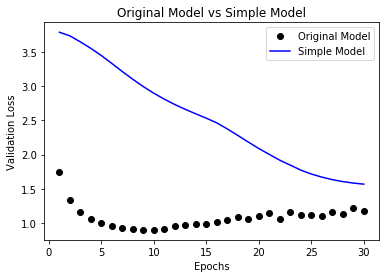

In [73]:
compare_val_loss(history_orig.history, history_low_cap.history, 'Original Model', 'Simple Model')

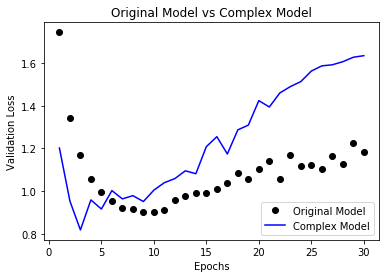

In [74]:
compare_val_loss(history_orig.history, history_high_cap.history, 'Original Model', 'Complex Model')

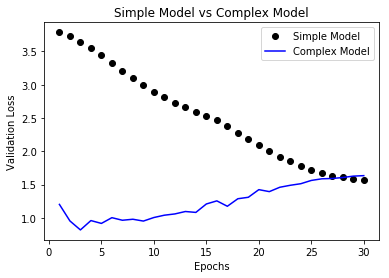

In [75]:
compare_val_loss(history_low_cap.history, history_high_cap.history, 'Simple Model', 'Complex Model')

## Validation Accuracy

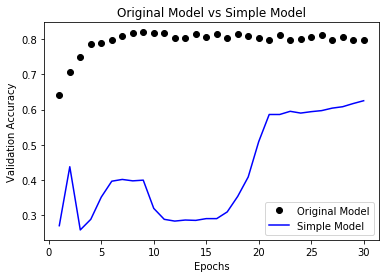

In [76]:
compare_val_acc(history_orig.history, history_low_cap.history, 'Original Model', 'Simple Model')

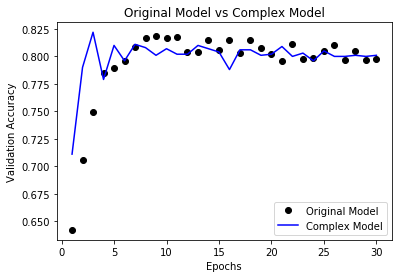

In [77]:
compare_val_acc(history_orig.history, history_high_cap.history, 'Original Model', 'Complex Model')

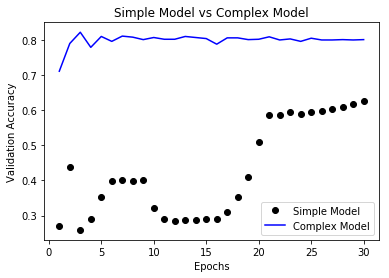

In [78]:
compare_val_acc(history_low_cap.history, history_high_cap.history, 'Simple Model', 'Complex Model')

## Training Loss

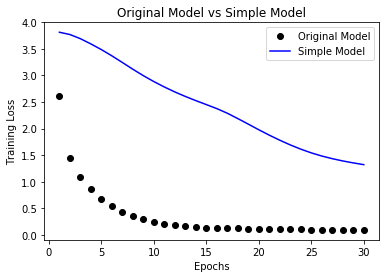

In [79]:
compare_train_loss(history_orig.history, history_low_cap.history, 'Original Model', 'Simple Model')

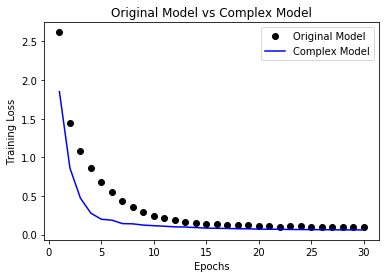

In [80]:
compare_train_loss(history_orig.history, history_high_cap.history, 'Original Model', 'Complex Model')

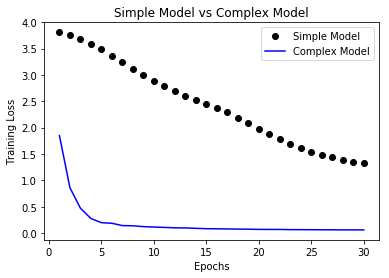

In [81]:
compare_train_loss(history_low_cap.history, history_high_cap.history, 'Simple Model', 'Complex Model')

## Loss curves of orignal, simple, and complex model

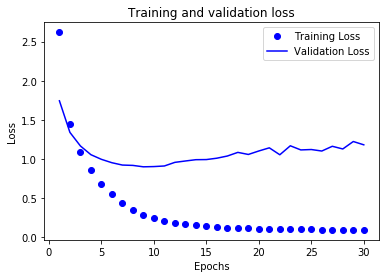

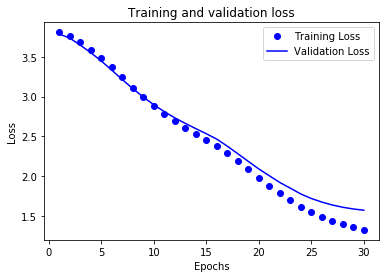

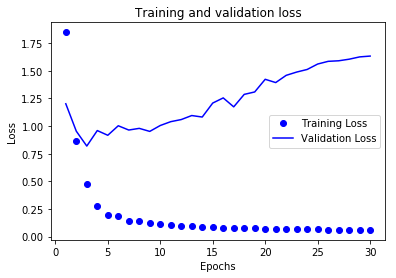

In [82]:
loss_curve(history_orig.history)
loss_curve(history_low_cap.history)
loss_curve(history_high_cap.history)

In [9]:
model_to_dot

<function keras.utils.vis_utils.model_to_dot>